In [6]:
### Plot paired simulation noise-biases for thesis chapter 3 using Planck style guides
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Configure Matplotlib options
from setup_matplotlib import *
from matplotlib.ticker import MaxNLocator

[   2.           22.18181818   42.36363636   62.54545455   82.72727273
  102.90909091  123.09090909  143.27272727  163.45454545  183.63636364
  203.81818182  224.          244.18181818  264.36363636  284.54545455
  304.72727273  324.90909091  345.09090909  365.27272727  385.45454545
  405.63636364  425.81818182  446.          466.18181818  486.36363636
  506.54545455  526.72727273  546.90909091  567.09090909  587.27272727
  607.45454545  627.63636364  647.81818182  668.          688.18181818
  708.36363636  728.54545455  748.72727273  768.90909091  789.09090909
  809.27272727  829.45454545  849.63636364  869.81818182  890.
  910.18181818  930.36363636  950.54545455  970.72727273  990.90909091
 1011.09090909 1031.27272727 1051.45454545 1071.63636364 1091.81818182
 1112.         1132.18181818 1152.36363636 1172.54545455 1192.72727273
 1212.90909091 1233.09090909 1253.27272727 1273.45454545 1293.63636364
 1313.81818182 1334.         1354.18181818 1374.36363636 1394.54545455
 1414.72727273

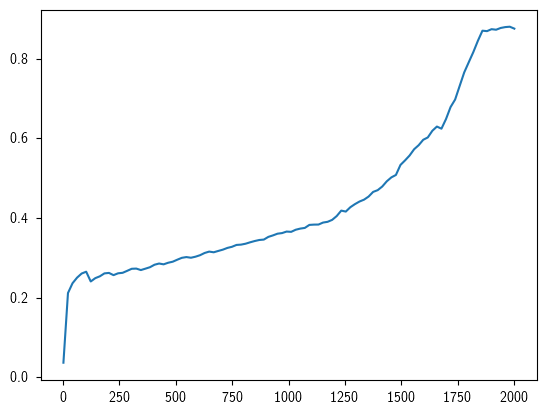

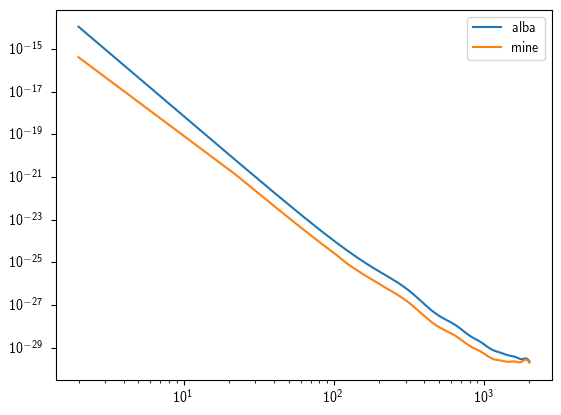

In [15]:
# Read in data from paired simulations

L, N0_equi_paired, N0_equi_err = np.loadtxt("/home/amb257/kappa_bispec/bispec_opt_est/Plots/paper_plots/Paired_sim_data/N0_kappa_noise.txt")
_, N1_equi_paired, N1_equi_err = np.loadtxt("/home/amb257/kappa_bispec/bispec_opt_est/Plots/paper_plots/Paired_sim_data/NONOISE_EQUI_N1_bs_kappa.txt")
_, N1_fold_paired, N1_fold_err = np.loadtxt("/home/amb257/kappa_bispec/bispec_opt_est/Plots/paper_plots/Paired_sim_data/NONOISE_N1_bs_FOLD_kappa.txt")

# Read in numerical results - changed to batch integral

L_N0_num = np.load("/home/amb257/kappa_bispec/bispec_opt_est/N0_numerical/N0_numerical_BATCHvegas/L_N0_num.npy")
N0_numerical_equi = np.load("/home/amb257/kappa_bispec/bispec_opt_est/N0_numerical/N0_numerical_BATCHvegas/N0_numerical_equi.npy")
L_N0_num = np.array(L_N0_num, dtype=np.float128)
N0_numerical_equi = np.array(N0_numerical_equi, dtype=np.float128)
# Read in Alba's results
L_alba, N0_alba = np.loadtxt("/home/amb257/kappa_bispec/bispec_opt_est/N0_numerical/N0_numerical_vegas/alba_n0.txt", unpack = True)

# Print numerical results
print(L_N0_num)
print(N0_numerical_equi)
ratio = N0_numerical_equi / N0_alba
plt.plot(L_N0_num, ratio)
plt.show()
plt.loglog(L_alba, N0_alba, label = 'alba')
plt.loglog(L_N0_num, N0_numerical_equi, label = 'mine')
plt.legend()


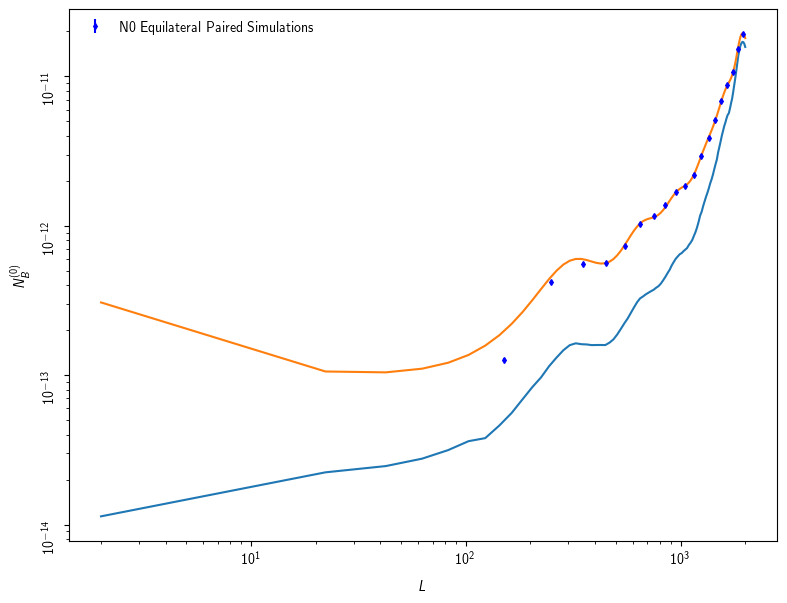

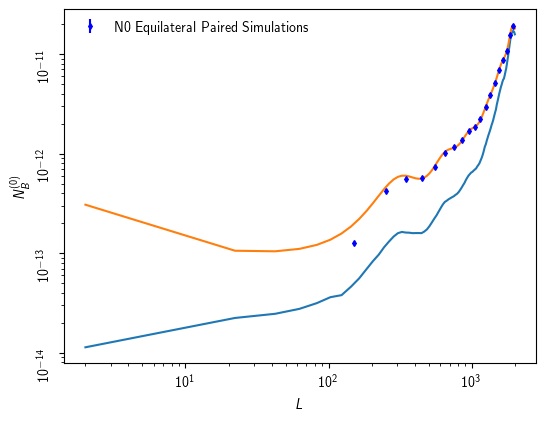

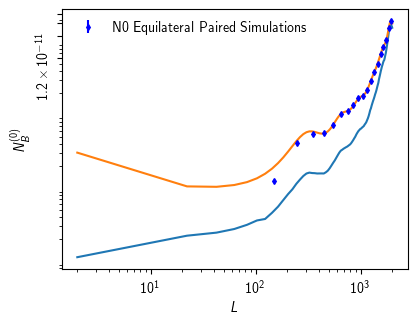

In [18]:
# Make N0 plot

for width in [18., 12., 8.8]:

    fig = plt.figure(figsize=(cm2inch(width), cm2inch(width*6/8.)))
    # this should be changed for making a panel of multiple figures
    ax = fig.add_subplot(111)


    # equi bispectrum
    plt.errorbar(L, N0_equi_paired,yerr = N0_equi_err, fmt='bd', label="N0 Equilateral Paired Simulations", markersize=3)
    plt.plot(L_N0_num, 1/8*(L_N0_num*(L_N0_num +1) )**3 *N0_numerical_equi)
    plt.plot(L_alba, 1/8 * (L_alba *(L_alba + 1)) **3*N0_alba)
    plt.xscale('log')
    plt.yscale('log')
    # legend
    leg = plt.legend(frameon=True)
    # remove box around legend
    leg.get_frame().set_edgecolor("white")
    leg.get_frame().set_alpha(.8)

    # labels
    plt.xlabel(r"$L$"); plt.ylabel(r"$N_B^{(0)}$")
    ax.yaxis.labelpad = 10*width/17.; ax.xaxis.labelpad = 10*width/17. # distance of axis label to tick labels

    # reduce ticks for small figures
    if width < 10:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

    # grid
    #plt.grid(True, which="major", axis="both")

    # axes limits
    #plt.ylim(6e-13, 3e-11)
    #plt.xlim([500, 2000])

    # reduce white space around figure
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # set vertical y axis ticklables
    for ticklabel in ax.yaxis.get_ticklabels():
        ticklabel.set_rotation("vertical")

    # save to pdf with right bounding box
    plt.savefig(f"./figures/paired_sims/N0_equi_{int(width*10)}.pdf", bbox_inches='tight', pad_inches=0.02)

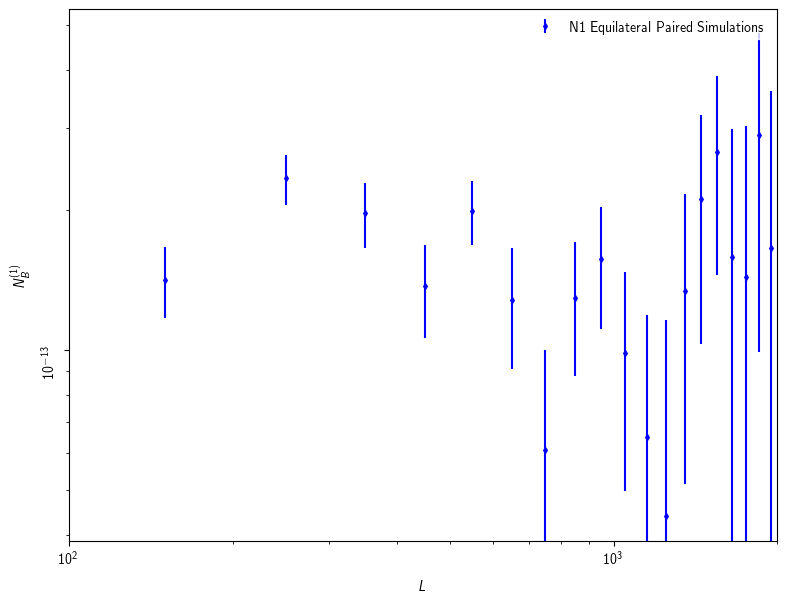

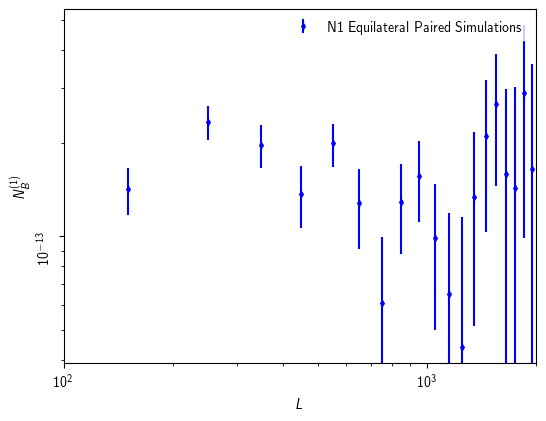

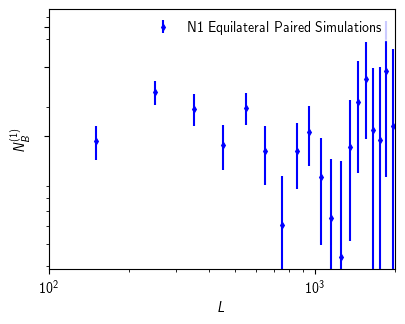

In [9]:
# Make N1 equilateral plots

for width in [18., 12., 8.8]:

    fig = plt.figure(figsize=(cm2inch(width), cm2inch(width*6/8.)))
    # this should be changed for making a panel of multiple figures
    ax = fig.add_subplot(111)

    # equi bispectrum
    plt.errorbar(L, N1_equi_paired,yerr = N1_equi_err, fmt='bd', label="N1 Equilateral Paired Simulations", markersize=3)
    plt.xscale('log')
    plt.yscale('log')
    # legend
    leg = plt.legend(frameon=True)
    # remove box around legend
    leg.get_frame().set_edgecolor("white")
    leg.get_frame().set_alpha(.8)

    # labels
    plt.xlabel(r"$L$"); plt.ylabel(r"$N_B^{(1)}$")
    ax.yaxis.labelpad = 10*width/17.; ax.xaxis.labelpad = 10*width/17. # distance of axis label to tick labels

    # reduce ticks for small figures
    if width < 10:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

    # grid
    #plt.grid(True, which="major", axis="both")

    # axes limits
    #plt.ylim(-4.8e-13, 2.5e-13)
    plt.xlim([100, 2000])

    # reduce white space around figure
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # set vertical y axis ticklables
    for ticklabel in ax.yaxis.get_ticklabels():
        ticklabel.set_rotation("vertical")

    # save to pdf with right bounding box
    plt.savefig(f"./figures/paired_sims/N1_equi_{int(width*10)}.pdf", bbox_inches='tight', pad_inches=0.02)

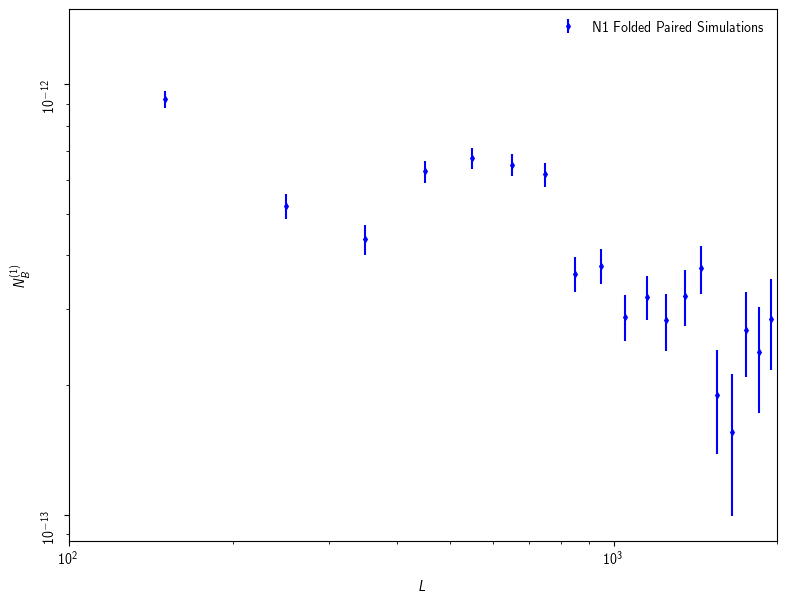

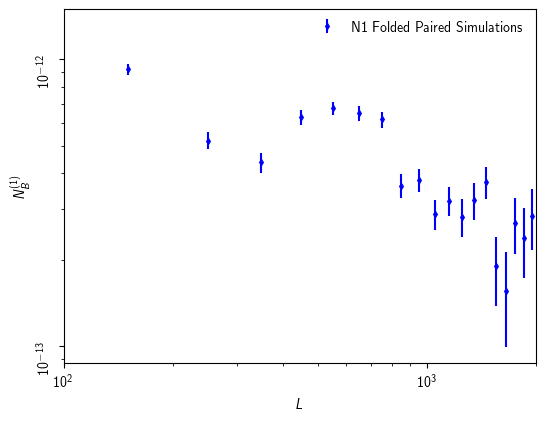

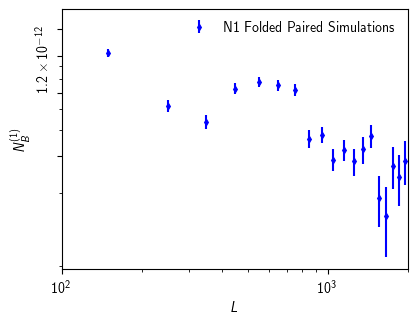

In [10]:
# Make N1 folded plots

for width in [18., 12., 8.8]:

    fig = plt.figure(figsize=(cm2inch(width), cm2inch(width*6/8.)))
    # this should be changed for making a panel of multiple figures
    ax = fig.add_subplot(111)

    # equi bispectrum
    plt.errorbar(L, np.abs(N1_fold_paired),yerr = N1_fold_err, fmt='bd', label="N1 Folded Paired Simulations", markersize=3)
    plt.xscale('log')
    plt.yscale('log')
    # legend
    leg = plt.legend(frameon=True)
    # remove box around legend
    leg.get_frame().set_edgecolor("white")
    leg.get_frame().set_alpha(.8)

    # labels
    plt.xlabel(r"$L$"); plt.ylabel(r"$N_B^{(1)}$")
    ax.yaxis.labelpad = 10*width/17.; ax.xaxis.labelpad = 10*width/17. # distance of axis label to tick labels

    # reduce ticks for small figures
    if width < 10:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

    # grid
    #plt.grid(True, which="major", axis="both")

    # axes limits
    #plt.ylim(-4.8e-13, 2.5e-13)
    plt.xlim([100, 2000])

    # reduce white space around figure
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # set vertical y axis ticklables
    for ticklabel in ax.yaxis.get_ticklabels():
        ticklabel.set_rotation("vertical")

    # save to pdf with right bounding box
    plt.savefig(f"./figures/paired_sims/N1_fold_{int(width*10)}.pdf", bbox_inches='tight', pad_inches=0.02)